In [15]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


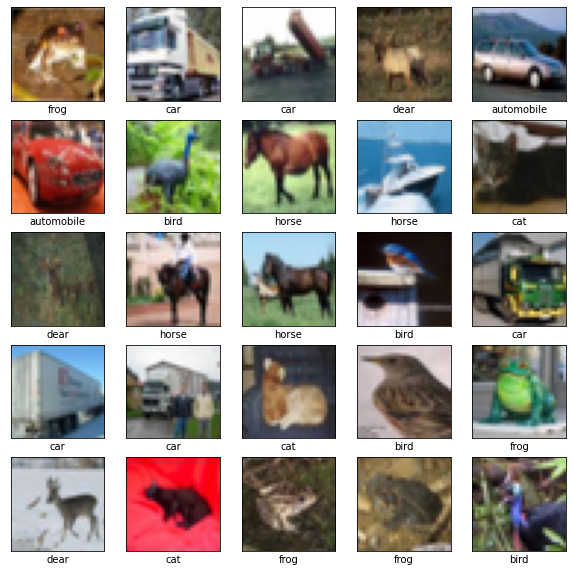

In [29]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'dear', 
               'dag', 'frog','horse', 'horse', 'car', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [21]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



In [22]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 14, 64)        12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 5, 64)          36928     
Total params: 50,176
Trainable params: 50,176
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 14, 64)        12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 5, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7359 - accuracy: 0.3667 - val_loss: 1.2333 - val_accuracy: 0.5632
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1804 - accuracy: 0.5818 - val_loss: 1.0782 - val_accuracy: 0.6170
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0123 - accuracy: 0.6460 - val_loss: 0.9639 - val_accuracy: 0.6697
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9054 - accuracy: 0.6841 - val_loss: 0.9411 - val_accuracy: 0.6700
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8194 - accuracy: 0.7146 - val_loss: 0.8844 - val_accuracy: 0.6980
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7617 - accuracy: 0.7337 - val_loss: 0.8973 - val_accuracy: 0.6983
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7028 - accuracy: 0.7593 - val_loss: 0.8588 -

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 3s - loss: 0.9243 - accuracy: 0.7007


In [28]:
print(test_acc)

0.7006999850273132
